*texto em itálico*# Notebook com código básico de regressão linear em Python (previsão PIB)
Previsão do PIB mensal baseado no histórico de tráfego
Fontes de dados:

PIB: https://www.itau.com.br/itaubba-pt/analises-economicas/nossas-series-economicas/pib-mensal-itau-unibanco

Tráfego: www.abcr.org.br

In [35]:
from sklearn.linear_model import LinearRegression
import numpy as np 
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/pib.csv')
df.head


<bound method NDFrame.head of      Unnamed: 0 ANO_MES     PIB     BRL  ...   PIBi9  PIBi10  PIBi11  PIBi12
0             1  jan/04  103.09  109.19  ...  101.17  101.70  100.03  100.00
1             2  fev/04  102.05   95.65  ...  101.93  101.17  101.70  100.03
2             3  mar/04  110.43   91.69  ...   99.96  101.93  101.17  101.70
3             4  abr/04  106.77   95.36  ...  102.24   99.96  101.93  101.17
4             5  mai/04  108.08   92.47  ...  102.59  102.24   99.96  101.93
..          ...     ...     ...     ...  ...     ...     ...     ...     ...
133         134  fev/15  144.42  147.35  ...  154.49  150.92  151.44  148.92
134         135  mar/15  151.68  149.64  ...  148.92  154.49  150.92  151.44
135         136  abr/15  147.03  153.81  ...  154.34  148.92  154.49  150.92
136         137  mai/15  148.94  149.66  ...  154.75  154.34  148.92  154.49
137         138  jun/15  147.37  146.13  ...  154.04  154.75  154.34  148.92

[138 rows x 38 columns]>

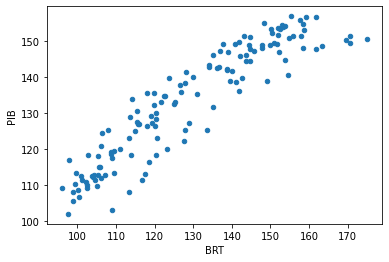

In [37]:
# # Análise de correlação entre PIB e Tráfego Brasil
ax = df.plot.scatter(x='BRT', y='PIB')

In [38]:
# Separação de bases de treino e teste
treino = df.iloc[0:125,]
teste  = df.iloc[126:135,]


In [40]:
mod1 = LinearRegression()  
X = treino.iloc[:, [6]].values.reshape(-1, 1) 
Y = treino.iloc[:, 3].values.reshape(-1, 1)  
mod1.fit(X, Y)  # perform linear regression

LinearRegression()

In [41]:
X_Prev = teste.iloc[:, [6]].values.reshape(-1, 1)
prev = mod1.predict(X_Prev)  
print(prev)

[[150.66911634]
 [158.66784148]
 [151.45129668]
 [160.32531887]
 [159.11480168]
 [178.02680489]
 [170.11188479]
 [144.58859537]
 [151.16263489]]


In [43]:
pib_real = teste.iloc[:, [3]].to_numpy()
erro = np.mean(abs(pib_real - prev))
# Erro absoluto médio
print(erro)
# Erro percentual médio
print(erro/np.mean(pib_real))


2.44263609898087
0.015358412784046049
